# VGG19
VGG19 is a convolutional neural network (CNN) architecture that wIt is a deep neural network architecture known for its simplicity and effectiveness in image classification tasks. VGG19 is an extension of the original VGG16 architecture, with 19 layersas developed by the Visual Geometry Group (VGG).VGG19 typically takes color images as input, with a fixed size of 224x224 pixels.VGG19 consists of 16 convolutional layers, each followed by a Rectified Linear Unit (ReLU) activation function.The convolutional layers use small 3x3 filters, with a stride of 1 pixel.  
  After every two convolutional layers, VGG19 includes a max-pooling layer with a 2x2 window and a stride of 2x2.There are three fully connected layers.The first two fully connected layers consist of 4,096 neurons each and use ReLU activation.The third fully connected layer has 1,000 neurons (for ImageNet classification) and uses a softmax activation function to produce class probabilities.VGG19 is a computationally intensive model with a large number of parameters.

Install Kaagle Library

In [ ]:
pip install kaggle

Uploading kaagle API key to download Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [ ]:

!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json


Downloading Dataset

In [ ]:


!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


 33% 5.00M/15.1M [00:00<00:00, 43.1MB/s]
100% 15.1M/15.1M [00:00<00:00, 100MB/s] 


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten


<ipython-input-5-4addd0ae159c>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


Extracting the Data From ZipFile

In [ ]:

from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
os.chdir('/content/brain_tumor_dataset/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/brain_tumor_dataset/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,99):
    y.append('N')
print(y)

  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

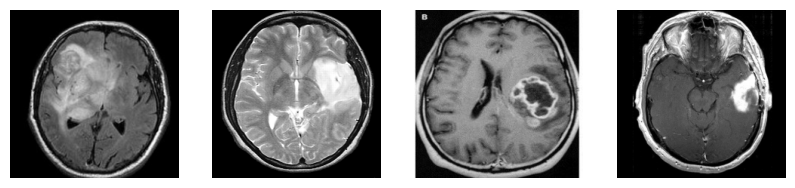

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

DataSet Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


Import VGG19

In [ ]:
from keras.applications import vgg19


img_rows, img_cols = 224, 224


vgg = vgg19.VGG19(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

80134624/80134624 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 Conv2D False
11 MaxPooling2D False
12 Conv2D False
13 Conv2D False
14 Conv2D False
15 Conv2D False
16 MaxPooling2D False
17 Conv2D False
18 Conv2D False
19 Conv2D False
20 Conv2D False
21 MaxPooling2D False


In [ ]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Training

In [ ]:
from tensorflow.keras.models import Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=20,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/20
6/6 [==============================] - 166s 29s/step - loss: 4.1501 - accuracy: 0.5680 - val_loss: 0.4449 - val_accuracy: 0.8333
Epoch 2/20
6/6 [==============================] - 161s 28s/step - loss: 0.4553 - accuracy: 0.7692 - val_loss: 0.5250 - val_accuracy: 0.7500
Epoch 3/20
6/6 [==============================] - 191s 34s/step - loss: 0.3215 - accuracy: 0.8343 - val_loss: 0.7445 - val_accuracy: 0.7619
Epoch 4/20
6/6 [==============================] - 192s 34s/step - loss: 0.1932 - accuracy: 0.9172 - val_loss: 0.5380 - val_accuracy: 0.7857
Epoch 5/20
6/6 [==============================] - 190s 34s/step - loss: 0.1478 - accuracy: 0.9527 - val_loss: 0.5669 - val_accuracy: 0.8214
Epoch 6/20
6/6 [==============================] - 190s 34s/step - loss: 0.0748 - accuracy: 0.9704 - val_loss: 0.6863 - val_accuracy: 0.7619
Epoch 7/20
6/6 [==============================] - 191s 34s/step - loss: 0.1041 - accuracy: 0.9527 - val_loss: 0.5776 - val_accuracy: 0.8690
Epoch 8/20
6/6 [====

Testing

1/1 [==============================] - 1s 584ms/step


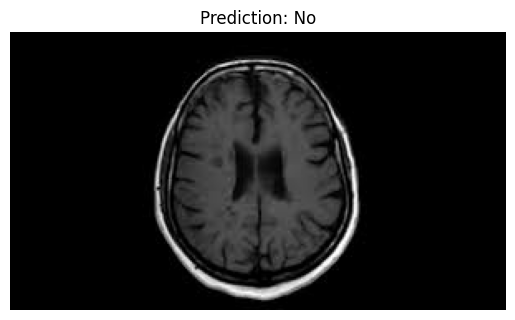

In [ ]:

from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the test image
test_image_path = "/content/brain_tumor_dataset/no/11 no.jpg"  # Replace with the path to your test image
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (224, 224))
test_image = np.expand_dims(test_image, axis=0)  # Add a batch dimension
test_image = test_image / 255.0  # Normalize pixel values (assuming VGG16 preprocessing)

# Make predictions
predictions = model.predict(test_image)

# Interpret the prediction result
if predictions[0][0] > predictions[0][1]:
    prediction_label = "No"
else:
    prediction_label = "Yes"

# Display the test image along with the predicted label
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 1s 571ms/step


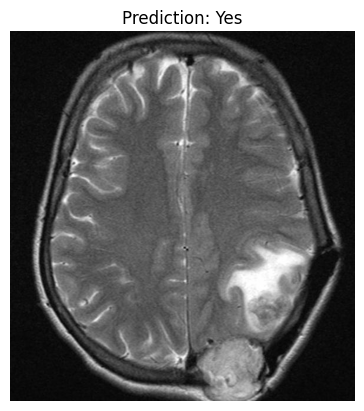

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the test image
test_image_path = "/content/yes/Y102.jpg"  # Replace with the path to your test image
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (224, 224))
test_image = np.expand_dims(test_image, axis=0)  # Add a batch dimension
test_image = test_image / 255.0  # Normalize pixel values (assuming VGG16 preprocessing)

# Make predictions
predictions = model.predict(test_image)

# Interpret the prediction result
if predictions[0][0] > predictions[0][1]:
    prediction_label = "No"
else:
    prediction_label = "Yes"

# Display the test image along with the predicted label
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()